In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [93]:
df=pd.read_excel('data1.xlsx')
X = df.iloc[:,0]
Y = df.iloc[:,1]
df


,Population,Profit
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


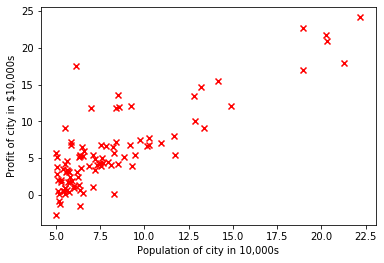

In [72]:
%matplotlib inline
plt.xlabel('Population of city in 10,000s')
plt.ylabel('Profit of city in $10,000s')
plt.scatter(df.Population,df.Profit, marker='x',color='red')

In [74]:
m=0
c=0

L=0.001
epochs =10000

n= float(len(X))

for i in range(epochs):
    Y_pred = m * X + c
    D_m = (-2/n) * sum(X * (Y - Y_pred))
    D_c = (-2/n) * sum(Y - Y_pred)
    m = m - L * D_m
    c = c - L * D_c

print(m,c)

y = c + m * 6.1101
print(y) 



1.1821845687911612 -3.787787806961037
3.4354781268098376


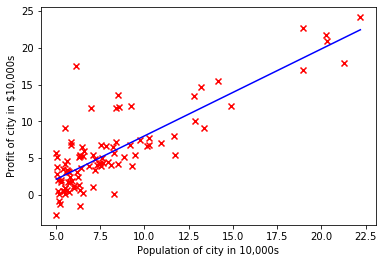

In [5]:
Y_pred = m*X + c
plt.xlabel('Population of city in 10,000s')
plt.ylabel('Profit of city in $10,000s')
plt.scatter(X,Y,marker='x',color='red')
plt.plot([min(X),max(X)],[min(Y_pred),max(Y_pred)], color='blue')
plt.show()

In [3]:
#Multiple Features Iterative 3.2

df2=pd.read_excel('ex1data2.xlsx')
df3=pd.read_excel('ex1data2.xlsx')
X0 = df2.iloc[:,0]
X1 = df2.iloc[:,1]
Y0 = df2.iloc[:,2]
df2

,size,bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900
5,1985,4,299900
6,1534,3,314900
7,1427,3,198999
8,1380,3,212000
9,1494,3,242500


In [4]:
# Feature Scaling

df2_mean = df2.mean()
df2_std = df2.std()

#means separatly of all variables
meanofsize = df2_mean[0]
meanofbedroom = df2_mean[1]
meanofprice = df2_mean[2]

#Std seprately of all variables
stdofsize = df2_std[0]
stdofbedroom = df2_std[1]
stdofprice = df2_std[2]

#According to formula
df2 = (df2 - df2.mean())/df2.std()
#Head
df2.head()


,size,bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [7]:
no_of_features = len(df2.axes[1])-1

#Make Matrixes
X = df2.iloc[:,0:no_of_features]
bias = np.ones([X.shape[0],1]) #make 1 d array of size X with all zeros
X=np.concatenate((bias,X),axis=1) #make X vector with first col of x0 = 0s

Y= df3.iloc[:,no_of_features:no_of_features+1].values
Thetha_Matrix = np.zeros([1,no_of_features+1]) 
Thetha_Matrix =Thetha_Matrix.T 
iterations = 50
alpha = 0.6

lenr = len(Y)
lenc = len(Y[0])

print(lenr,lenc)

print(Y)

47 1
[[399900]
 [329900]
 [369000]
 [232000]
 [539900]
 [299900]
 [314900]
 [198999]
 [212000]
 [242500]
 [239999]
 [347000]
 [329999]
 [699900]
 [259900]
 [449900]
 [299900]
 [199900]
 [499998]
 [599000]
 [252900]
 [255000]
 [242900]
 [259900]
 [573900]
 [249900]
 [464500]
 [469000]
 [475000]
 [299900]
 [349900]
 [169900]
 [314900]
 [579900]
 [285900]
 [249900]
 [229900]
 [345000]
 [549000]
 [287000]
 [368500]
 [329900]
 [314000]
 [299000]
 [179900]
 [299900]
 [239500]]


In [6]:
m = len(Y)
J = np.zeros(iterations) #Cost of error after each step of correcting error intilize with zeros

for i in range(iterations):
    Thetha_Matrix = Thetha_Matrix - (alpha/m) * (X.T.dot((X.dot(Thetha_Matrix) -Y)))
    J[i] = 1/(2*m)*(((X.dot(Thetha_Matrix)-Y).T)).dot((X.dot(Thetha_Matrix)-Y))
    
    
print(Thetha_Matrix)
print(J)
Thetha_Matrix_iter = Thetha_Matrix      


[[340412.65957447]
 [110631.03137212]
 [ -6649.45536409]]
[1.21572837e+10 3.97468918e+09 2.52695234e+09 2.21673466e+09
 2.12386663e+09 2.08523079e+09 2.06597250e+09 2.05569950e+09
 2.05010064e+09 2.04702960e+09 2.04534193e+09 2.04441398e+09
 2.04390367e+09 2.04362302e+09 2.04346867e+09 2.04338379e+09
 2.04333710e+09 2.04331143e+09 2.04329731e+09 2.04328954e+09
 2.04328527e+09 2.04328292e+09 2.04328163e+09 2.04328092e+09
 2.04328053e+09 2.04328031e+09 2.04328020e+09 2.04328013e+09
 2.04328009e+09 2.04328007e+09 2.04328006e+09 2.04328006e+09
 2.04328005e+09 2.04328005e+09 2.04328005e+09 2.04328005e+09
 2.04328005e+09 2.04328005e+09 2.04328005e+09 2.04328005e+09
 2.04328005e+09 2.04328005e+09 2.04328005e+09 2.04328005e+09
 2.04328005e+09 2.04328005e+09 2.04328005e+09 2.04328005e+09
 2.04328005e+09 2.04328005e+09]


Text(0.5, 1.0, 'comaprision of Error and Iterations')

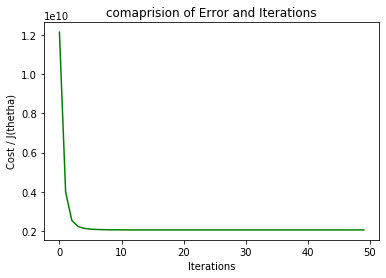

In [114]:
fig, ax = plt.subplots()  
iter = np.arange(iterations)
ax.plot(iter, J, 'g')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost / J(thetha)')  
ax.set_title('comaprision of Error and Iterations')  

In [4]:
#Normalization 3.3

ones =[]
for i in range(len(X0)):
    ones.append(1.0)

# no of features represent by n
n=2
#no of samples represent by m
m= len(X0)

    
Matrix_X=np.vstack((ones, X0, X1)).T

#we need to take transpose of matrix_x cuz its of dim 47 x 3 and y is of dim 47 x 1 
# in order to multiply both of them we take transpose of matrix_X

x_transpose = np.transpose(Matrix_X)
Theta_Matrix_temp= np.linalg.pinv(x_transpose.dot(Matrix_X))
Theta_Matrix_temp2 = x_transpose.dot(Y0)
Thetha_Matrix = Theta_Matrix_temp.dot(Theta_Matrix_temp2) 
print(Thetha_Matrix)

pred_y_normalization = Thetha_Matrix[0] + 1650*Thetha_Matrix[1] + 3*Thetha_Matrix[2]
print(pred_y_normalization)


[89597.90954361   139.21067402 -8738.01911255]
293081.46433498873


In [115]:


house_size= 1650
house_bedroom = 3

norm_size = (house_size - meanofsize)/stdofsize

norm_bedroom = (house_bedroom - meanofbedroom)/stdofbedroom

pred_y_iteration = Thetha_Matrix_iter[0] +  norm_size*Thetha_Matrix_iter[1] + norm_bedroom*Thetha_Matrix_iter[2]
print(pred_y_iteration)


[293081.46844896]
[3.66472178e+10]
